In [25]:
%load_ext autoreload
%autoreload 2

from fundusClassif.data.data_factory import get_datamodule_from_config
from nntools.utils import Config
from fundusClassif.utils.images import get_preprocessing
from fundus_data_toolkit.datamodules import DataHookPosition

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Train dataset size: 37622
Valid dataset size: 10342
Test datasets ids: ['EYEPACS_test', 'IDRID_test', 'DDR_test']


/home/florian/miniconda3/envs/DL/lib/python3.12/site-packages/nntools/utils/plotting.py:151: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


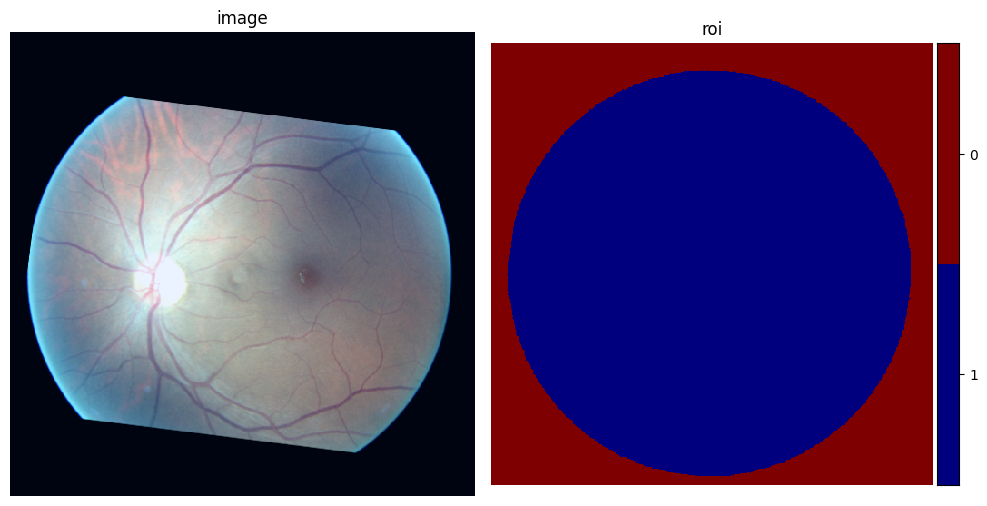

In [26]:
config = Config('../configs/config.yaml')
config

config["data_preprocessing"]["name"] = "autobalance"
if config["data_preprocessing"]["name"] != "absent":
        config["data"]["cache_dir"] = config["data_preprocessing"]["name"]
        
        prepro_function = get_preprocessing(config["data_preprocessing"]["name"])

datamodule = get_datamodule_from_config(config['datasets'], config['data'])
dataloader = datamodule.train_dataloader()
dataloader_valid = datamodule.val_dataloader()
test_dataloader = datamodule.test_dataloader()
test_datasets_ids = [d.dataset.id for i, d in enumerate(test_dataloader)]

#taille des datasets
print(f"Train dataset size: {len(dataloader.dataset)}")
print(f"Valid dataset size: {len(dataloader_valid.dataset)}")
print(f"Test datasets ids: {test_datasets_ids}")

if config["data_preprocessing"]["name"] != "absent":
        datamodule.set_data_pipeline_hook(prepro_function, position=DataHookPosition.POST_RESIZE_PRE_CACHE)

datamodule.train.plot(6)

